In [12]:
# %pip install -q wordcloud

In [13]:
from collections import Counter

In [14]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
# считываем книги
# автор - Владислав Крапивин
book1 = open('1981_crane_and_lightnings.txt').read() # Журавлёнок и молнии
book2 = open('1992_bronze_boy.txt').read() # Бронзовый мальчик
book3 = open('1996_grandson_and_his_brothers.txt').read() # Бабушкин внук и его братья
book4 = open('2004_venus_across_the_sun.txt').read() # Прохождение Венеры по диску солнца
book5 = open('2005_stomp_of_chess_horses.txt').read() # Топот шахматных лошадок
book6 = open('2010_topol_kids.txt').read() # Тополята

books = [book1, book2, book3, book4, book5, book6]

In [181]:
# переписываем книги отдельными токенами
books_words = []
tok = nltk.tokenize.WhitespaceTokenizer()
for i in range(0, 6):
    books_words.append(tok.tokenize(books[i]))

[['Журавленок',
  'и',
  'молнии',
  'Владислав',
  'Петрович',
  'Крапивин',
  'Юрке',
  'Журавину',
  'в',
  'наследство',
  'от',
  'дедушки',
  'достались',
  'редкие',
  'книги.',
  'Отец,',
  'водитель',
  'самосвала,',
  '«работяга»,',
  'искренне',
  'не',
  'понимает',
  'увлечения',
  'сына',
  'мудреными',
  'фолиантами',
  '–',
  'ему',
  'куда',
  'ближе',
  '«Три',
  'мушкетера».',
  'И',
  'подумать',
  'только',
  '–',
  'за',
  'потрепанную',
  'книжонку',
  'в',
  'комиссионке',
  'дают',
  'пятьдесят',
  'рублей.',
  'И',
  'однажды,',
  'чтобы',
  'рассчитаться',
  'с',
  'грузчиками,',
  'отец',
  'украдкой',
  'сдает',
  'книгу',
  'в',
  'магазин.',
  'Когда',
  'же',
  'пропажа',
  'вскрылась,',
  'он',
  'увильнул',
  'от',
  'ответа.',
  'Выведенный',
  'из',
  'себя',
  'суровым',
  'обличением',
  'сына,',
  'Журавин-отец',
  'решает',
  'проучить',
  'его',
  'старым',
  'дедовским',
  'способом',
  '–',
  'жестокой',
  'поркой…',
  'Владислав',
  'Крапивин

In [17]:
# считаем токены и записываем их в переменную
tok = nltk.tokenize.WhitespaceTokenizer()
words_per_book = []
for i in range(0, 6):
    words_per_book.append(len(tok.tokenize(books[i])))
    words_per_book_print = len(tok.tokenize(books[i]))
    print(f'В {i+1} книге {words_per_book_print} слов')
words_per_book

В 1 книге 82756 слов
В 2 книге 88312 слов
В 3 книге 67238 слов
В 4 книге 11973 слов
В 5 книге 14879 слов
В 6 книге 81272 слов


[82756, 88312, 67238, 11973, 14879, 81272]

### `Лексическое разнообразие`

In [18]:
# считаем кол-во и проценты уникальных слов
unique_words_per_book = []
unique_words_percentage = []
for i in range(0, 6):
    unique_words_per_book_print = len(set(tok.tokenize(books[i])))
    print(f'В {i+1} книге {unique_words_per_book_print} уникальных слов')
    print(f'В процентах кол-во уникальных слов на текст составляет: {unique_words_per_book_print / words_per_book[i] * 100}%\n')
    unique_words_per_book.append(unique_words_per_book_print)
    unique_words_percentage.append(unique_words_per_book_print / words_per_book[i] * 100)
print(unique_words_per_book)
print(unique_words_percentage)

В 1 книге 25116 уникальных слов
В процентах кол-во уникальных слов на текст составляет: 30.349461066267096%

В 2 книге 30234 уникальных слов
В процентах кол-во уникальных слов на текст составляет: 34.235437992571796%

В 3 книге 22299 уникальных слов
В процентах кол-во уникальных слов на текст составляет: 33.16428210238258%

В 4 книге 5686 уникальных слов
В процентах кол-во уникальных слов на текст составляет: 47.49018625240124%

В 5 книге 6904 уникальных слов
В процентах кол-во уникальных слов на текст составляет: 46.400967806976276%

В 6 книге 27648 уникальных слов
В процентах кол-во уникальных слов на текст составляет: 34.01909636775273%

[25116, 30234, 22299, 5686, 6904, 27648]
[30.349461066267096, 34.235437992571796, 33.16428210238258, 47.49018625240124, 46.400967806976276, 34.01909636775273]


In [65]:
# сбор данных для визуализации
df1 = pd.DataFrame(words_per_book, columns =['all_words'], index = ['book 1', 'book 2', 'book 3', 'book 4', 'book 5', 'book 6'])
df2 = pd.DataFrame(unique_words_per_book, columns =['unique_words'], index = ['book 1', 'book 2', 'book 3', 'book 4', 'book 5', 'book 6'])
data_percentage = pd.DataFrame(unique_words_percentage, columns =['percentage'], index = ['book 1', 'book 2', 'book 3', 'book 4', 'book 5', 'book 6'])
data_words = pd.concat([df1, df2], axis=1)
# display(data_words)

<Axes: title={'center': 'Лексическое разнообразие'}>

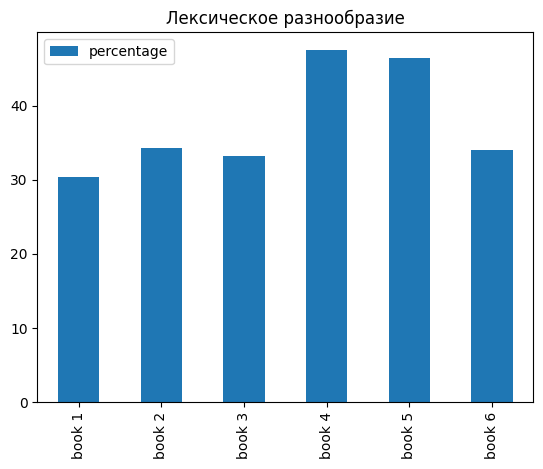

In [40]:
fig = data_percentage.plot.bar(title = 'Лексическое разнообразие')
display(fig)

Может показаться, что в книгах 4 и 5 идет резкое возрастание лексического разнообразия, <br> если смотреть на процентное соотношение уникальных слов текста ко всему тексту.<br>
Визуализация процентов наглядно показывает нам, что действительно есть скачок роста. Так ли это?

<Axes: title={'center': 'Отношение уникальных слов ко всем словам'}>

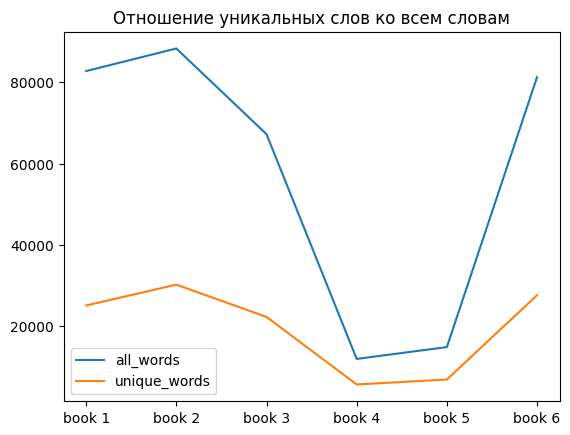

In [45]:
df = pd.DataFrame(dict(data_words))
fig1 = df.plot.line(title = 'Отношение уникальных слов ко всем словам')
display(fig1)

Однако если посмотреть на ститистику по всем словам в книгах и уникальным, то можно заметить, <br> что именно в книгах где лексическое разнообразие наибольше, идет спад на количество слов в тексте в целом.<br> За счет этого уникальные слова и начинают составлять бОльшую долю текста. Проверим.

In [61]:
# обработка данных для визуализации
data_all_percent = pd.concat([df1, data_percentage], axis=1)
data_all_percent['all_words'] = data_all_percent['all_words'] / 1500 # 1500 - рандомный множитель внедренный для наглядности визуализации

<Axes: title={'center': 'Количество всех слов в книгах к лексическому разообразию'}>

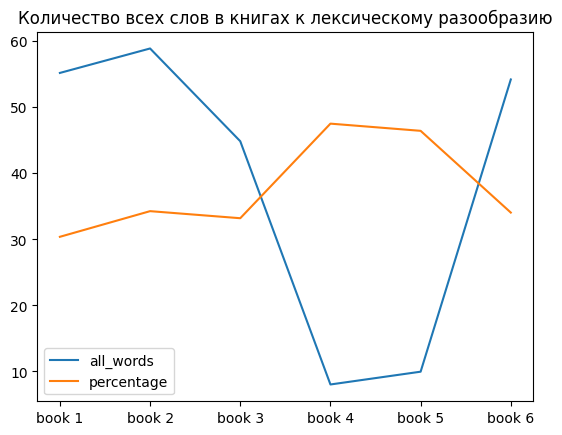

In [64]:
df = pd.DataFrame(dict(data_all_percent))
fig2 = df.plot.line(title = 'Количество всех слов в книгах к лексическому разообразию')
display(fig2)

Проверим это на графике взаимоотношения между количеством слов в книгах и лексическим разообразием. <br> Для этого разделим количество слов на рандомный множитель для наглядности, но при этом не потеряв пропорциональное отношение. <br>Действительно, при резком спаде количества слов - идет резкий скачок процентов уникальных слов. <br> В результате чего можно заключить, что в целом лексическое разнообразие у Крапивина из года в года +- the same.<br> Не считая выбросов, с причиной которых мы разобрались.

### `Количество частей речи`

In [24]:
import spacy
from spacy import displacy

In [25]:
# загружаем русский корпус
nlp = spacy.load('ru_core_news_sm')

In [179]:
tok = nltk.tokenize.WhitespaceTokenizer()
book1_words = str(tok.tokenize(book1))
book2_words = str(tok.tokenize(book2))
book3_words = str(tok.tokenize(book3))
book4_words = str(tok.tokenize(book4))
book5_words = str(tok.tokenize(book5))
book6_words = str(tok.tokenize(book6))

In [180]:
doc11 = nlp(book1_words)
doc22 = nlp(book2_words)
doc33 = nlp(book3_words)
doc44 = nlp(book4_words)
doc55 = nlp(book5_words)
doc66 = nlp(book6_words)

In [26]:
# # cсчитываем
# doc1 = nlp(book1)
# doc2 = nlp(book2)
# doc3 = nlp(book3)
# doc4 = nlp(book4)
# doc5 = nlp(book5)
# doc6 = nlp(book6)

In [121]:
docs = [doc11, doc22, doc33, doc44, doc55, doc66]

In [119]:
# def pandas_speech(doc):
#     counts = Counter([token.pos_ for token in doc])
#     sorted_speech = {n: counts[n] for n in sorted(counts)}
#     df_sorted_speech = pd.DataFrame.from_dict(sorted_speech, orient='index').reset_index()
#     return df_sorted_speech

In [182]:
#prepocessing data
counts1 = Counter([token.pos_ for token in doc11])
sorted_speech1 = {n: counts1[n] for n in sorted(counts1)}
df_sorted_speech1 = pd.DataFrame.from_dict(sorted_speech1, orient='index', columns = ['book1']).reset_index()

counts2 = Counter([token.pos_ for token in doc22])
sorted_speech2 = {n: counts2[n] for n in sorted(counts2)}
df_sorted_speech2 = pd.DataFrame.from_dict(sorted_speech2, orient='index', columns = ['book2']).reset_index()

counts3 = Counter([token.pos_ for token in doc33])
sorted_speech3 = {n: counts3[n] for n in sorted(counts3)}
df_sorted_speech3 = pd.DataFrame.from_dict(sorted_speech3, orient='index', columns = ['book3']).reset_index()

counts4 = Counter([token.pos_ for token in doc44])
sorted_speech4 = {n: counts4[n] for n in sorted(counts4)}
df_sorted_speech4 = pd.DataFrame.from_dict(sorted_speech4, orient='index', columns = ['book4']).reset_index()

counts5 = Counter([token.pos_ for token in doc55])
sorted_speech5 = {n: counts5[n] for n in sorted(counts5)}
df_sorted_speech5 = pd.DataFrame.from_dict(sorted_speech5, orient='index', columns = ['book5']).reset_index()

counts6 = Counter([token.pos_ for token in doc66])
sorted_speech6 = {n: counts6[n] for n in sorted(counts6)}
df_sorted_speech6 = pd.DataFrame.from_dict(sorted_speech6, orient='index', columns = ['book6']).reset_index()

data12 = df_sorted_speech1.merge(df_sorted_speech2, on='index')
data123 = data12.merge(df_sorted_speech3, on='index')
data1234 = data123.merge(df_sorted_speech4, on='index')
data12345 = data1234.merge(df_sorted_speech5, on='index')
dataspeech = data12345.merge(df_sorted_speech6, on='index')

dataspeech['book1'] = dataspeech['book1'] / words_per_book[0] * 100
dataspeech['book2'] = dataspeech['book2'] / words_per_book[1] * 100
dataspeech['book3'] = dataspeech['book3'] / words_per_book[2] * 100
dataspeech['book4'] = dataspeech['book4'] / words_per_book[3] * 100
dataspeech['book5'] = dataspeech['book5'] / words_per_book[4] * 100
dataspeech['book6'] = dataspeech['book6'] / words_per_book[5] * 100

dataspeech

,index,book1,book2,book3,book4,book5,book6
0,ADJ,8.444101,8.710028,8.135281,7.784181,9.920022,8.370657
1,ADP,8.918991,9.619304,9.136203,8.786436,9.019423,9.195049
2,ADV,8.282179,8.396367,8.803058,9.671761,9.987230,7.894478
3,AUX,0.439847,0.467660,0.487819,0.409254,0.457020,0.408505
4,CCONJ,5.458215,4.972144,5.313959,5.178318,5.746354,5.121075
5,DET,2.136401,2.334904,2.540230,2.447173,2.191007,1.972389
6,INTJ,0.436222,0.472190,0.386686,0.609705,0.369648,0.478640
7,NOUN,19.588912,21.760350,20.183527,20.170383,22.185631,21.305000
8,NUM,0.705689,0.863982,0.817990,0.843565,0.793064,0.739492
9,PART,5.104162,4.866836,5.343704,5.637685,5.349822,4.925436


In [183]:

data_adj = dataspeech.query('index == "ADJ"')
data_adv = dataspeech.query('index == "ADV"')
data_verb = dataspeech.query('index == "VERB"')
data_noun = dataspeech.query('index == "NOUN"')
data_punct = dataspeech.query('index == "PUNCT"')


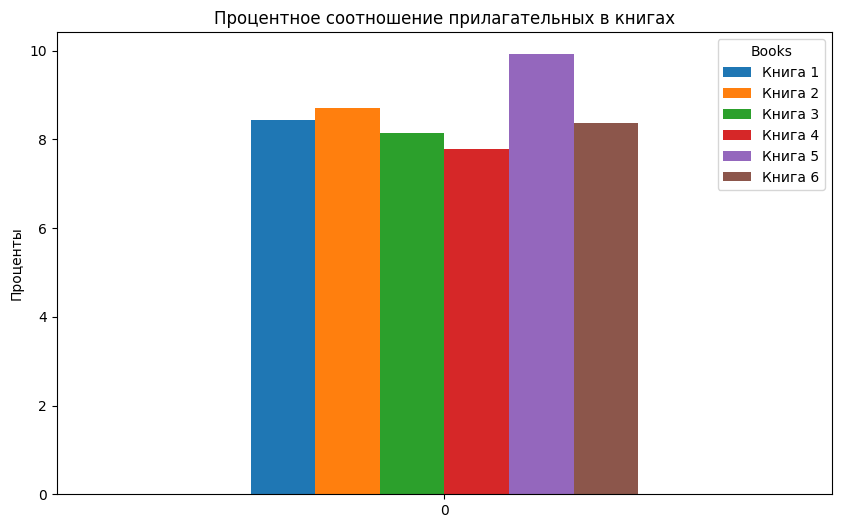

In [184]:
data_adj.plot(kind='bar', figsize=(10, 6))
plt.title('Процентное соотношение прилагательных в книгах')
plt.ylabel('Проценты')
plt.xticks(rotation=0)
plt.legend(title='Books', labels=['Книга 1', 'Книга 2', 'Книга 3', 'Книга 4', 'Книга 5', 'Книга 6'])
plt.show()

В целом красноречивость по эпитетам у Крапивина одинакова от книги к книге, но в 2005 году в пятой книге, чуть больше разошелся на описания.

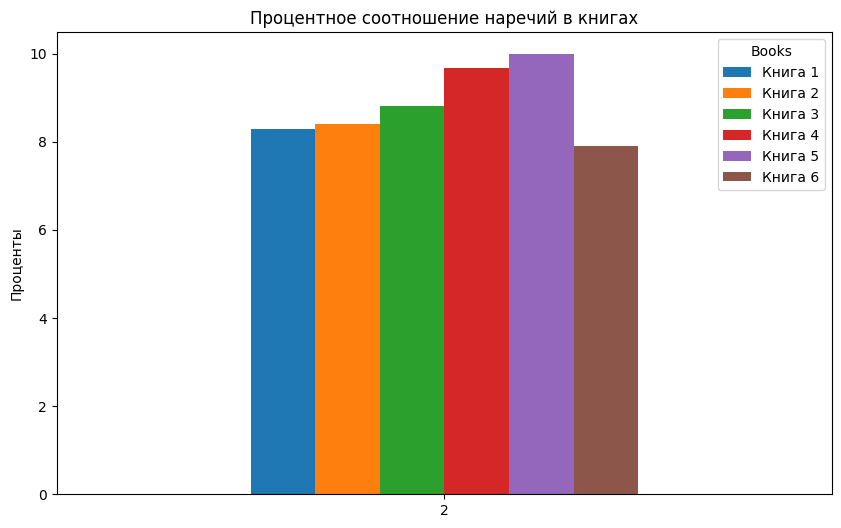

In [185]:
data_adv.plot(kind='bar', figsize=(10, 6))
plt.title('Процентное соотношение наречий в книгах')
plt.ylabel('Проценты')
plt.xticks(rotation=0)
plt.legend(title='Books', labels=['Книга 1', 'Книга 2', 'Книга 3', 'Книга 4', 'Книга 5', 'Книга 6'])
plt.show()

Помимо прилагательных из прошлой таблички, не пожалел еще наречий для описаний в пятой книге. <br> Рост наречий так же затронул и 4 книгу, написанную за год до пятой, рядом по времени написания.

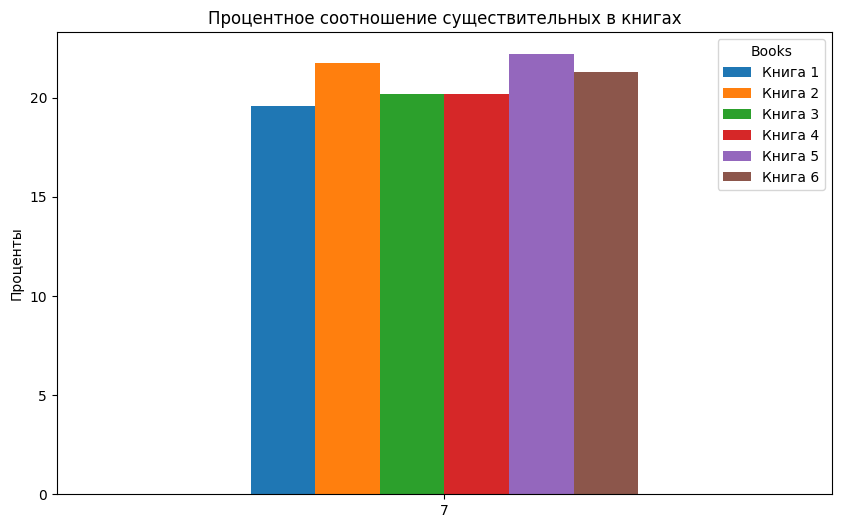

In [186]:
data_noun.plot(kind='bar', figsize=(10, 6))
plt.title('Процентное соотношение существительных в книгах')
plt.ylabel('Проценты')
plt.xticks(rotation=0)
plt.legend(title='Books', labels=['Книга 1', 'Книга 2', 'Книга 3', 'Книга 4', 'Книга 5', 'Книга 6'])
plt.show()

В целом, уровень существительных +- стабилен от книги к книге.

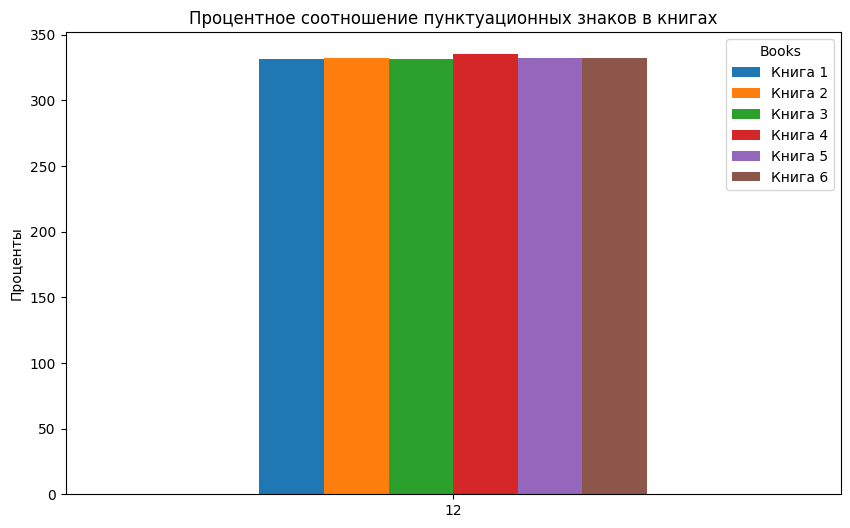

In [187]:
data_punct.plot(kind='bar', figsize=(10, 6))
plt.title('Процентное соотношение пунктуационных знаков в книгах')
plt.ylabel('Проценты')
plt.xticks(rotation=0)
plt.legend(title='Books', labels=['Книга 1', 'Книга 2', 'Книга 3', 'Книга 4', 'Книга 5', 'Книга 6'])
plt.show()

Можно заметить по оси y, что процентное соотношение знаков препинания к словам в тексте достаточно высокое в каждой книге, <br> значения выходят даже за 300%. <br>А всё по тому, что Крапивин часто использует диалоги в своих произведениях, которые вводятся с знака "--", поэтому получается такой реузльтат с перебором знаков препинания...

### `Динамика текста`

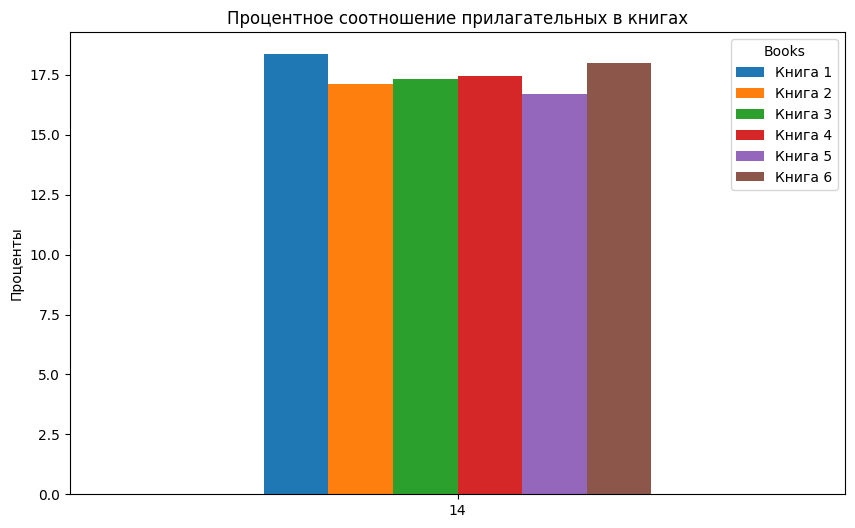

In [188]:
data_verb.plot(kind='bar', figsize=(10, 6))
plt.title('Процентное соотношение прилагательных в книгах')
plt.ylabel('Проценты')
plt.xticks(rotation=0)
plt.legend(title='Books', labels=['Книга 1', 'Книга 2', 'Книга 3', 'Книга 4', 'Книга 5', 'Книга 6'])
plt.show()

оцениваем динамику текста через динамичные глаголы. <br>Особенно высоко процентное отношение глаголов к тексту в первой (1981) и последней книге (2010), <br>получается в начале и в конце авторского пути имеется рост динамичности текстов.

### `Word Cloud`

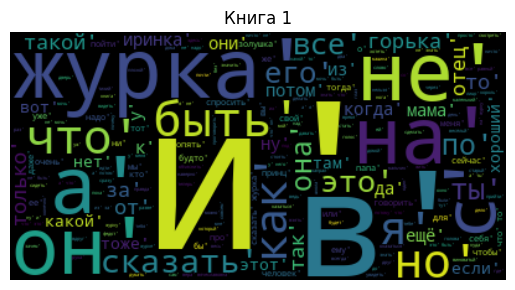

Журка: 1252
 Отец: 266
 Иринка: 235


In [286]:
list1 = []
for token in doc11:
    list1.append(token.lemma_)
list1 = str(list1)
wordcloud = WordCloud().generate(list1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Книга 1')
plt.show()

zhurka_count = 0
ira_count = 0
otez_count = 0
for token in doc11:
    if token.lemma_ == 'журка':
        zhurka_count += 1
    elif token.lemma_ == "иринка":
        ira_count += 1
    elif token.lemma_ == "отец":
        otez_count += 1
print(f'Журка: {zhurka_count}\n Отец: {otez_count}\n Иринка: {ira_count}')

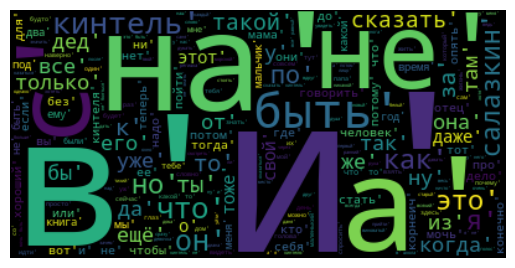

Кинтель: 951
 Салазкин: 463
 Дед: 234


In [285]:
list2 = []
for token in doc22:
    list2.append(token.lemma_)
list2 = str(list2)
wordcloud = WordCloud().generate(list2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Книга 2')
plt.axis("off")
plt.show()

sal_count = 0
kintel_count = 0
ded_count = 0
for token in doc22:
    if token.lemma_ == 'салазкин':
        sal_count += 1
    elif token.lemma_ == "кинтель":
        kintel_count += 1
    elif token.lemma_ == "дед":
        ded_count += 1
print(f'Кинтель: {kintel_count}\n Салазкин: {sal_count}\n Дед: {ded_count}')

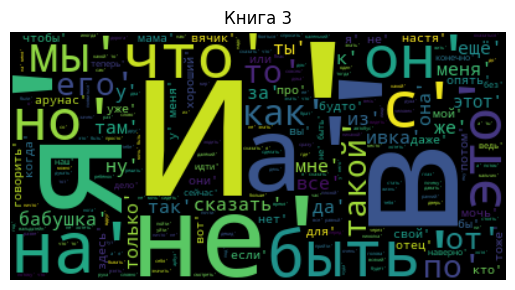

In [295]:
list3 = []
for token in doc33:
    list3.append(token.lemma_)
list3 = str(list3)
wordcloud = WordCloud().generate(list3)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Книга 3')
plt.axis("off")
plt.show()

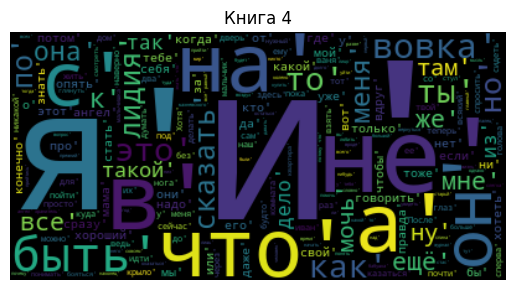

In [293]:
list4 = []
for token in doc44:
    list4.append(token.lemma_)
list4 = str(list4)
wordcloud = WordCloud().generate(list4)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Книга 4')
plt.axis("off")
plt.show()

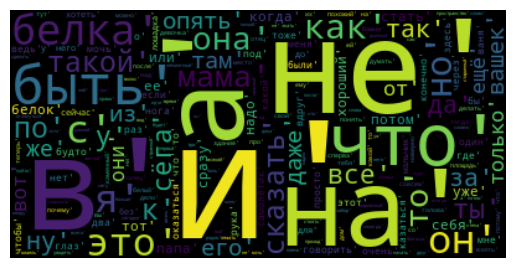

In [252]:
list5 = []
for token in doc55:
    list5.append(token.lemma_)
list5 = str(list5)
wordcloud = WordCloud().generate(list5)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Книга 5')
plt.axis("off")
plt.show()

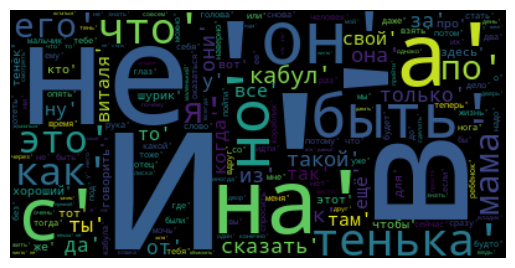

In [253]:
list6 = []
for token in doc66:
    list6.append(token.lemma_)
    
list6 = str(list6)
wordcloud = WordCloud().generate(list6)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Книга 6')
plt.axis("off")
plt.show()

Можно заметить, что во всех книгах одни из самых часто встречаемых слов это имена собсвтенные - имена героев произведения. <br>
Помимо того, в рассказах Крапивина часто поднимаются темы семьи и взаимоотношений в ней, <br>
что тоже отразилось в часто повторяющихся словах, где можно встретить часто "мама, отец, папа, бабушка, дед"